In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

In [63]:
# Lendo CSVs 

ano2016 = pd.read_csv('./OrcamentoGoverno/Estado/orcamento_estado_2016.csv')
ano2015 = pd.read_csv('./OrcamentoGoverno/Estado/orcamento_estado_2015.csv')
ano2014 = pd.read_csv('./OrcamentoGoverno/Estado/orcamento_estado_2014.csv')

In [64]:
# Agregando CSVs por ano para um dado único

total = pd.concat([ano2016, ano2015, ano2014])

In [65]:
# Transformando ano e mês em uma coluna de data 

months = []
for i, row in total.iterrows():
    months.append(date(int(row['ano']), int(row['mes']), 1))
total = total.assign(date=pd.Series(months).values)

In [66]:
# Remove dados de ano e mês que não serão mais utilizados

total.drop(['ano', 'mes'],inplace=True,axis=1)

In [67]:
# Ordenando os dados por data

total = total.sort(['date'])

/home/leportella/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [71]:
# Passando o dado de reais para milhões de reais

liquidado_milhoes = []
for i, row in total.iterrows():
    liquidado_milhoes.append(row['vl_liquidado']/10**6)
total = total.assign(vl_liquidado_m=pd.Series(liquidado_milhoes).values)

total.drop(['vl_liquidado'],inplace=True,axis=1)

# Análises Univariadas Não Gráficas

Análises univariadas de variáveis quantitativas são formas preliminares de avaliar a distribuição da população.
Podemos dividir as análises não gráficas em 3 tipos:

1) **Tendências centrais** - busca encontrar o centro da distribuição (média, mediana e moda).
    Obs: Ao se trabalhar com muitos outliers, mediana é mais aconselhável que a média
    
2) **Amplitude (spread)** - indica quão longe do ponto central ainda será possível encontrar dados (variância, desvio padrão range de interquartil).

3) **Assimetria e kurtose** - diferenças em relação à curva feita pelos dados


In [72]:
# Média e Mediana
liquidado_media = total['vl_liquidado_m'].mean()
liquidado_mediana = total['vl_liquidado_m'].median()

# Variância e Desvio Padrão
liquidado_variancia = total['vl_liquidado_m'].var()
liquidado_desvio_padrao = total['vl_liquidado_m'].std()

# Calculo dos quartis
qs, bins= pd.qcut(total['vl_liquidado_m'], [.25, .5, .75], retbins=True)
liquidado_quartil25 = bins[0]
liquidado_quartil50 = bins[1]
liquidado_quartil75 = bins[2]
liquidado_range_interquartil = liquidado_quartil75 - liquidado_quartil25

print('Análises Não Gráficas - Valores Liquidados')
print('')
print('Média do Valor Liquidado: {}'.format(liquidado_media))
print('Mediana do Valor Liquidado: {}'.format(liquidado_mediana))
print('')
print('Variância do Valor Liquidado: {}'.format(liquidado_variancia))
print('Desvio Padrão do Valor Liquidado: {}'.format(liquidado_desvio_padrao))
print('Range Interquartil do Valor Liquidado: {}'.format(liquidadi_range_interquartil))

Análises Não Gráficas - Valores Liquidados

Média do Valor Liquidado: 645.8065653220588
Mediana do Valor Liquidado: 626.9138435

Variância do Valor Liquidado: 78207.90275614904
Desvio Padrão do Valor Liquidado: 279.656758824365
Range Interquartil do Valor Liquidado: 151909605.00750005


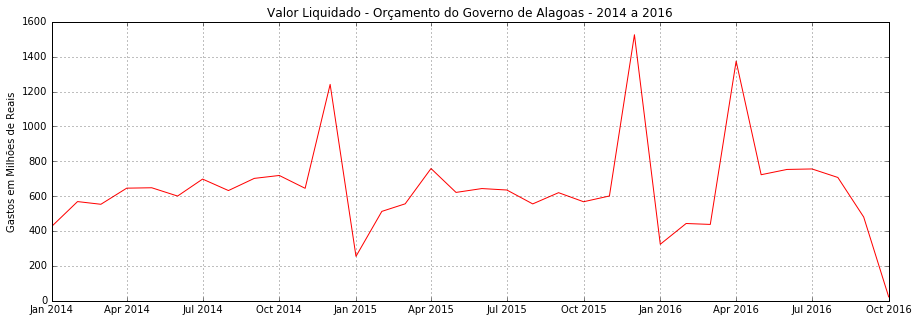

In [77]:
# Analisando graficamente a série histórica de gastos

fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')
plt.plot(total['date'], total['vl_liquidado_m'], 'r')

plt.title('Valor Liquidado - Orçamento do Governo de Alagoas - 2014 a 2016')
plt.ylabel('Gastos em Milhões de Reais')
plt.grid()

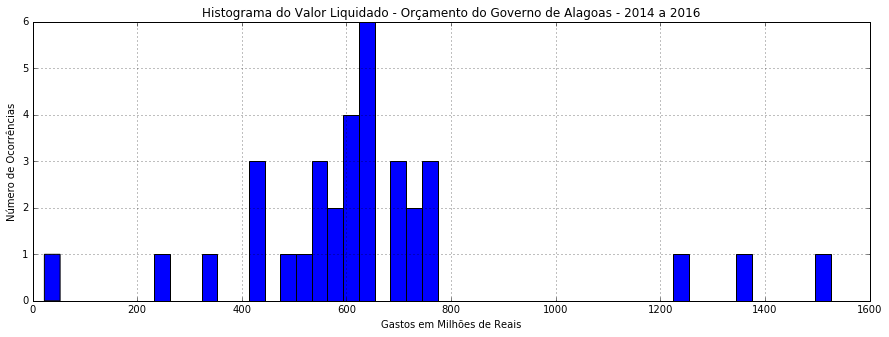

In [78]:
fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')
hist = plt.hist(total['vl_liquidado_m'], bins=50)

plt.title('Histograma do Valor Liquidado - Orçamento do Governo de Alagoas - 2014 a 2016')
plt.xlabel('Gastos em Milhões de Reais')
plt.ylabel('Número de Ocorrências')
plt.grid()

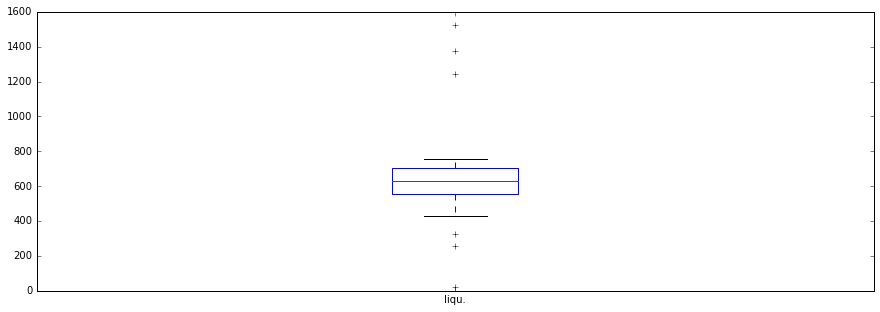

In [81]:
fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')
boxplot = plt.boxplot(total['vl_liquidado_m'], labels=['liqu.'])